In [ ]:
# ----------------- !!! NOTEs !!! ----------------------- 
# For better and intuitive understanding
# 1. Combine this with lectures(1-3) of Andrej Karpathy's lecture: GPT-series 

# 2. Use ChatGPT 

# https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=1&t=7294s

In [39]:
# Linear regression 
# Part 1: using synthetic dataset
# Part 2: using real-world dataset: California Housing dataset

In [ ]:
# ------------------------ !!! PART 1 !!! --------------------------

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# set a random seed for reproducibility
np.random.seed(42)

In [5]:
# generate random x values
x_values = 2 * np.random.rand(100,1)

# calculate corresponding y values from the equation y = 3x + 4 plus some noise 
y_values = 4 + 3 * x_values + np.random.randn(100,1)

<function matplotlib.pyplot.show(close=None, block=None)>

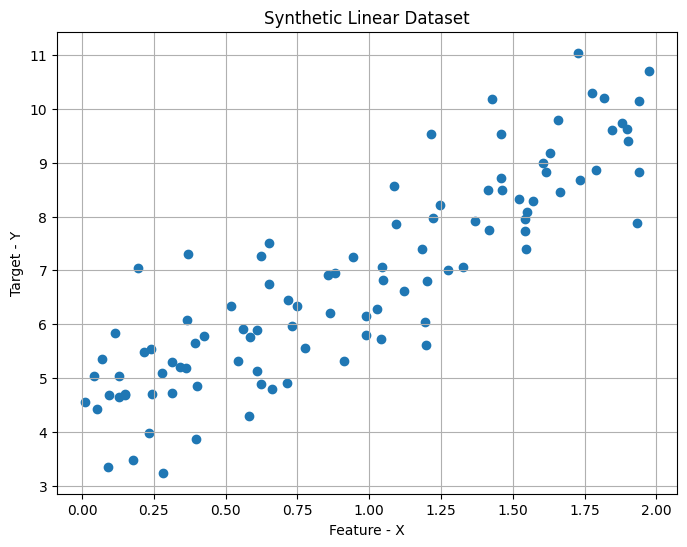

In [6]:
# plot the generated synthetic dataset
plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values)
plt.title("Synthetic Linear Dataset")
plt.xlabel("Feature - X")
plt.ylabel("Target - Y")
plt.grid(True)
plt.show

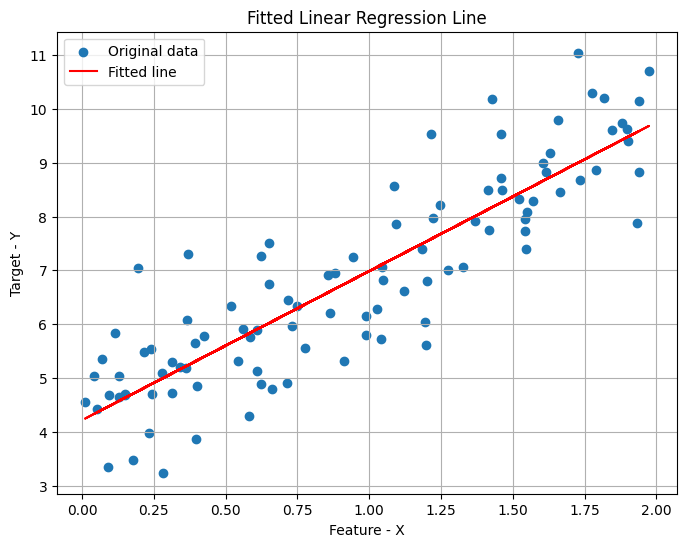

(2.7701133864384837, 4.215096157546747)

In [7]:
# Now we fit a built-in-scikit Linear Regression Model to this data
# i.e to train it with our synthetic dataset to recognize the pattern, and 
# draw the best-fit line
from sklearn.linear_model import LinearRegression

# create a linear regression model instance
linear_regression_model = LinearRegression()

# fit the model on the synthetic dataset
linear_regression_model.fit(x_values, y_values)

# Now we can extract the slope (coeffiecient) and the intercept from the model
slope = linear_regression_model.coef_[0][0]
intercept = linear_regression_model.intercept_[0]

# let's use the model to make predictions
y_predicted = linear_regression_model.predict(x_values)

# plot the original data (scatter plot) and the regression line(plot)
plt.figure(figsize=(8,6))
plt.scatter(x_values, y_values, label="Original data")
plt.plot(x_values, y_predicted, color='red', label="Fitted line")
plt.title("Fitted Linear Regression Line")
plt.xlabel("Feature - X")
plt.ylabel("Target - Y")
plt.legend()
plt.grid(True)
plt.show()

slope, intercept

In [9]:
# y = 3x + 4
# expected_slope: 3
# expected_intercept: 4

# After training the model on the dataset:-
# learned_slope: 2.77
# learned_intercept: 4.21


# This regression model takes care of 
# - finding the pattern in the data
# - using that pattern to make predictions
# - doing all the math and computation behind the scenes
# - but how ????????????????????????????????  
# we would soon make a Linear Regression model from scratch to see that

# Now let's measure the model's accuracy with MSE (Mean Squared Error):
from sklearn.metrics import mean_squared_error

# calculate MSE
mse = mean_squared_error(y_values, y_predicted)
mse

0.8065845639670531

In [11]:
# For now, let's split the data into training set and testing set: 80% || 20%
# train the model on first set and evaluate it on the test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)

# fit the model on training set
linear_regression_model.fit(x_train, y_train)

# predict the testing set
y_test_predicted = linear_regression_model.predict(x_test)

test_intercept = linear_regression_model.intercept_[0]
test_slope = linear_regression_model.coef_[0][0]
# calculate Mean squared error (MSE) on the testing set
test_mse = mean_squared_error(y_test, y_test_predicted)

test_intercept, test_slope,test_mse  # quite similar to train set

(4.142913319458566, 2.7993236574802762, 0.6536995137170021)

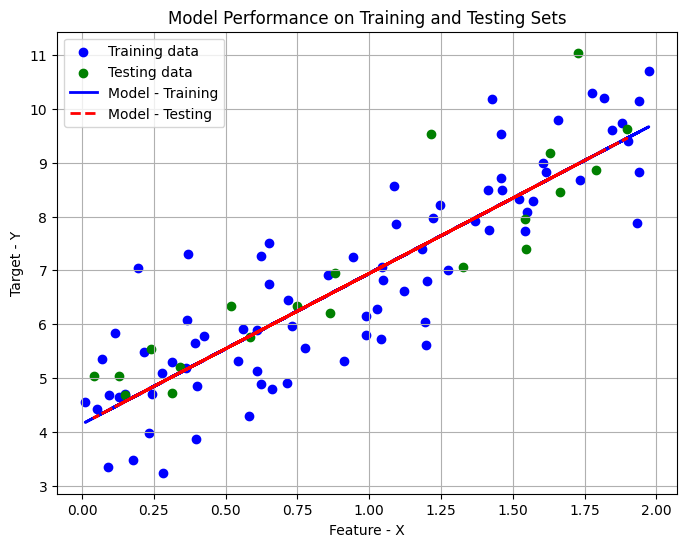

In [16]:
# Let's visualize the model performance on splitted data

# Scatter plot for the training set
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='blue', label='Training data')

# Scatter plot for the testing set
plt.scatter(x_test, y_test, color='green', label='Testing data')

# Line plot for the model's predictions on the training set
plt.plot(x_train, linear_regression_model.predict(x_train), color='blue', linewidth=2, label='Model - Training')

# Line plot for the model's predictions on the testing set
plt.plot(x_test, y_test_predicted, color='red', linestyle='--', linewidth=2, label='Model - Testing')

plt.title("Model Performance on Training and Testing Sets")
plt.xlabel("Feature - X")
plt.ylabel("Target - Y")
plt.legend()
plt.grid(True)
plt.show()

--------------------------------------------------------------------------
## Creating Linear Regression Model from scratch

In [48]:
# Creating a LINEAR REGRESSION MODEL

# 1. Define the model's hypothesis function: y = mx + b

# 2. Define the loss/cost function(MSE) to measure model prediction errors.
# MSE:  (Sum of all (ypred - y)**2)/n

# 3. Train: Perform gradient descent to tune parameters m and b.
# 4. Test the model with new data to evaluate its performance.

# GOAL: to find the right combination of m and b so that
# this model can make similar predictions as from eq: y = 3x + 4

# Detailed steps:
# Start with random m and b; here m=0, b=0
# At each iteration:
# - Calculate y_pred using the current m and b for each x in the training set.
# - Compute MSE/loss to quantify how far off our predictions are 
# - Calculate gradients 
# - Adjust m and b slightly in the direction that reduces loss(here: MSE).
# Repeat the process until our predictions are as close as possible to the true values.
# Validate with testing data: are our predictions accurate on data not seen during training?

In [17]:
# Initialize parameters
m = 0
b = 0

# Set the learning rate and the number of iterations
learning_rate = 0.01
iterations = 1000

# Number of samples
n = float(len(x_train))

# perform gradient descent

for i in range(iterations):
    # make predictions
    y_pred = m*x_train + b
    
    # forward pass: calculate loss
    loss = np.sum((y_train - y_pred) ** 2) / n    # (∑(y_train - y_pred)**2)/n
    
    # backward pass
    # calculate gradient of the loss function wrt m and b
    m_grad = (-2/n) * np.sum((y_train - y_pred) * x_train) 
    b_grad = (-2/n) * np.sum(y_train - y_pred)  
    
    # update the parameters
    m -= learning_rate * m_grad
    b -= learning_rate * b_grad
    
    # print the loss
    if i % 100 == 0:
        print(f"loss: {loss:.4f}")
    
# the value of m and b after gradient descent
print(f"final_slope: {m:.4f}")
print(f"final_intercept: {b:.4f}")
print(f"final_loss: {loss:.4f}")

loss: 49.2530
loss: 0.9878
loss: 0.9141
loss: 0.8819
loss: 0.8653
loss: 0.8568
loss: 0.8524
loss: 0.8501
loss: 0.8489
loss: 0.8483
final_slope: 2.8291
final_intercept: 4.1096
final_loss: 0.8480


## SUMMARY OF PART 1

loss: 49.2530
loss: 0.9878
loss: 0.9141
loss: 0.8819
loss: 0.8653
loss: 0.8568
loss: 0.8524
loss: 0.8501
loss: 0.8489
loss: 0.8483


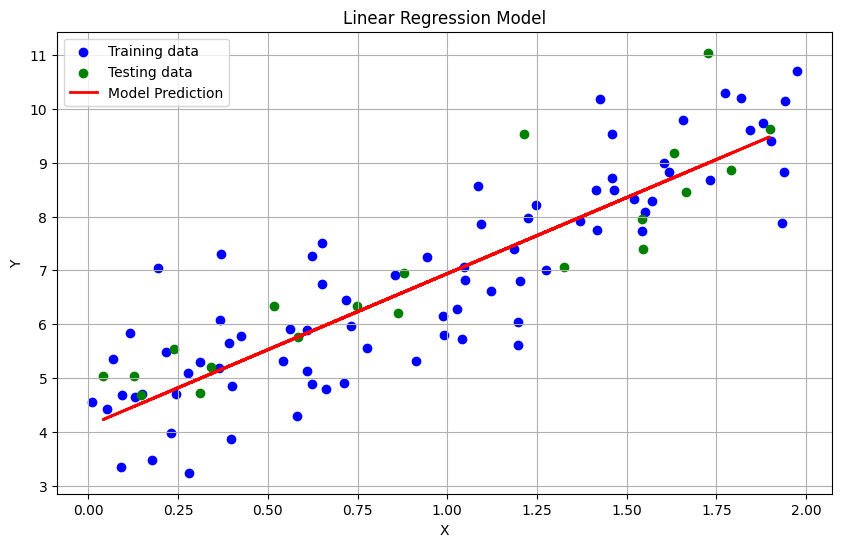

Final model slope (m): 2.8291
Final model intercept (b): 4.1096


In [18]:
# the entire LINEAR REGRESSION process

# Import numpy for numerical computations and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic data
np.random.seed(42)  # Seed for reproducibility
x = 2 * np.random.rand(100, 1)  # Features; rand no. b/w 0 and 1
y = 4 + 3 * x + np.random.randn(100, 1)  # Labels with some noise

# 2. Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)

# 3. LINEAR REGRESSION MODEL
# a) initialize the model
# b) Train: Forward pass → backward pass → update m,b: repeat

# set initial parameters
m = 0  # Slope
b = 0  # Intercept

# Define the learning rate and no. of iterations
learning_rate = 0.01
iterations = 1000

# no of samples
n = float(len(x_train))

# Perform gradient descent to fit the model; 
# The model learning from the training set

for i in range(iterations):
    
    # forward pass
    y_pred = m * x_train + b 
    loss = np.sum((y_train - y_pred) ** 2) / n   
    # backward pass
    gradient_m = (-2/n) * np.sum((y_train - y_pred) * x_train)  # Gradient wrt m
    gradient_b = (-2/n) * np.sum(y_train - y_pred)  # Gradient wrt b
    # update parameters
    m -= learning_rate * gradient_m  
    b -= learning_rate * gradient_b 
    
    if i % 100 == 0:
        print(f"loss: {loss:.4f}")

# Output the final slope and intercept
final_slope, final_intercept = m, b

# 4. Test the model performance on test set
# Predict y-values for the testing set using the trained model
y_test_pred = final_slope * x_test + final_intercept

# 5. Visualize the model performance
# Plot the training data, testing data, and the linear regression model line
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='green', label='Testing data')
plt.plot(x_test, y_test_pred, color='red', linewidth=2, label='Model Prediction')
plt.title('Linear Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Print final model parameters
print(f"Final model slope (m): {final_slope:.4f}")
print(f"Final model intercept (b): {final_intercept:.4f}")


In [38]:
# WHAT WE DID 
# 1. Generate data using eq. y = 3x + 4 & add some noise

# 2. Split the data: 80% train, 20% test

# 3. Define LINEAR REGRESSION model: y = mx + b, start with m = 0, b = 0

# 4. Optimize: Train & Adjust m, b via gradient descent

# 5. Result:Trained Model y = 2.71x + 4.21 approximates true relationship

# 6. Visualize: Show model performance on train and test set


In [50]:
# --------------------------- PART 2:  -----------------------------
# Multipe Linear Regression: using California Housing Dataset
# a model to predict house prices

In [2]:
# 1. Let's bring california housing dataset and do data anyalysis
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd

# Load the California housing dataset
housing = fetch_california_housing(as_frame=True)

print(housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [20]:
housing.frame.head()  # first few rows of the dataset 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
housing.target.head()  # the values we want to predict; target var

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [22]:
housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


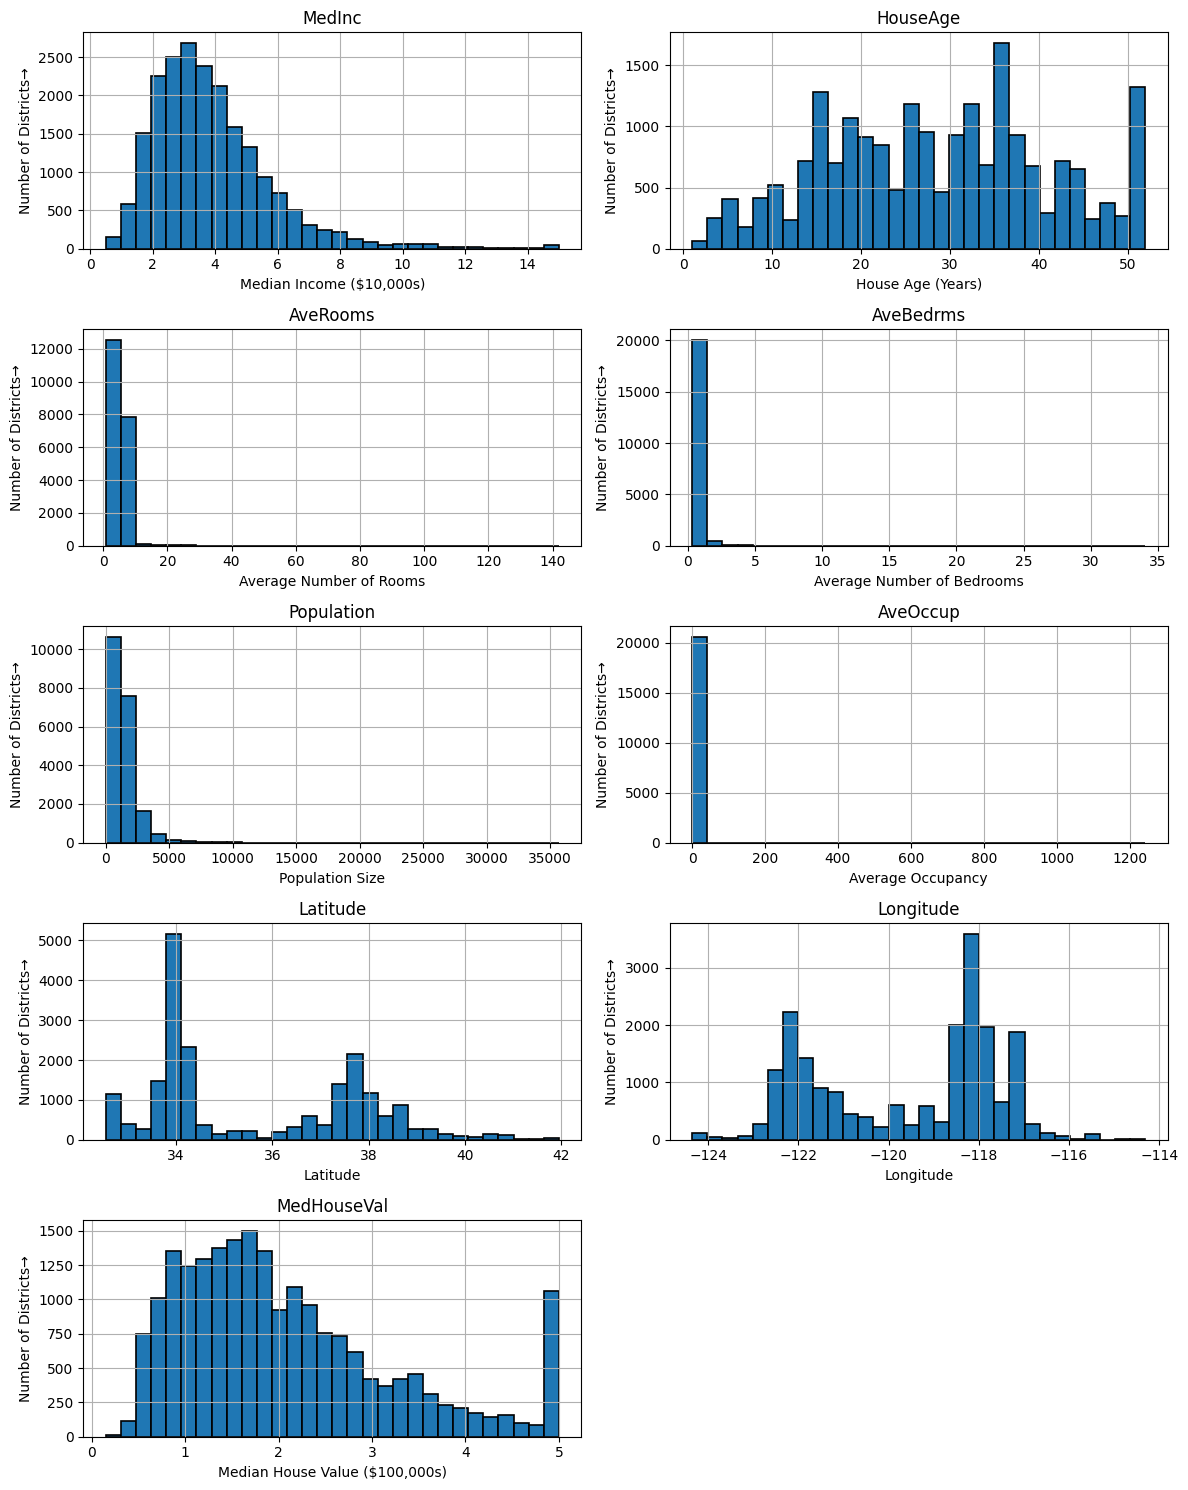

In [23]:
import matplotlib.pyplot as plt

# Plot histograms
axes = housing.frame.hist(bins=30, edgecolor='black', linewidth=1.2, figsize=(12,15), layout=(5,2))

# x and y labels
for ax in axes.flatten():
    # X-axis labels
    if ax.get_title() == 'MedInc':
        ax.set_xlabel('Median Income ($10,000s)')
    elif ax.get_title() == 'HouseAge':
        ax.set_xlabel('House Age (Years)')
    elif ax.get_title() == 'AveRooms':
        ax.set_xlabel('Average Number of Rooms')
    elif ax.get_title() == 'AveBedrms':
        ax.set_xlabel('Average Number of Bedrooms')
    elif ax.get_title() == 'Population':
        ax.set_xlabel('Population Size')
    elif ax.get_title() == 'AveOccup':
        ax.set_xlabel('Average Occupancy')
    elif ax.get_title() == 'Latitude':
        ax.set_xlabel('Latitude')
    elif ax.get_title() == 'Longitude':
        ax.set_xlabel('Longitude')
    elif ax.get_title() == 'MedHouseVal':
        ax.set_xlabel('Median House Value ($100,000s)')
    
    # Y-axis labels
    ax.set_ylabel('Number of Districts→')

# Adjust subplot parameters and show plot
plt.tight_layout()
plt.show()


In [24]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


In [76]:
# Given the wide range of values and the presence of outliers, 
# models that are robust to outliers 
# (like tree-based models or using robust scalers) might perform better.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


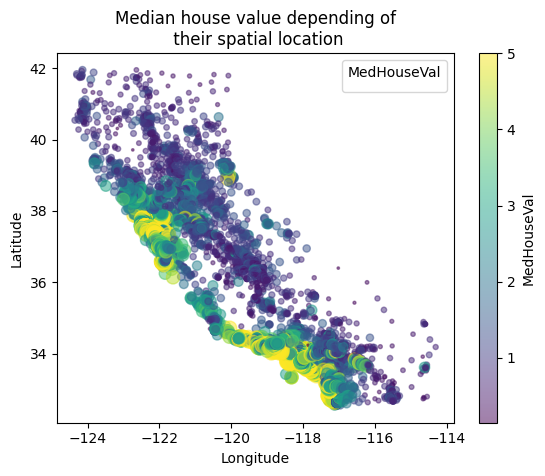

In [25]:
#the x- and y-axis would be the latitude and longitude and 
# the circle size and color would be linked with the house value in the district.

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Prepare colormap
cmap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=housing.frame['MedHouseVal'].min(), vmax=housing.frame['MedHouseVal'].max())

# Create scatter plot
plt.scatter(
    housing.frame['Longitude'],
    housing.frame['Latitude'],
    s=housing.frame['MedHouseVal'] / housing.frame['MedHouseVal'].max() * 100,  # Normalize the sizes
    c=housing.frame['MedHouseVal'],
    cmap=cmap,
    alpha=0.5,
    norm=norm
)
plt.colorbar(label='MedHouseVal')
plt.title("Median house value depending of\n their spatial location")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title="MedHouseVal")
plt.show()


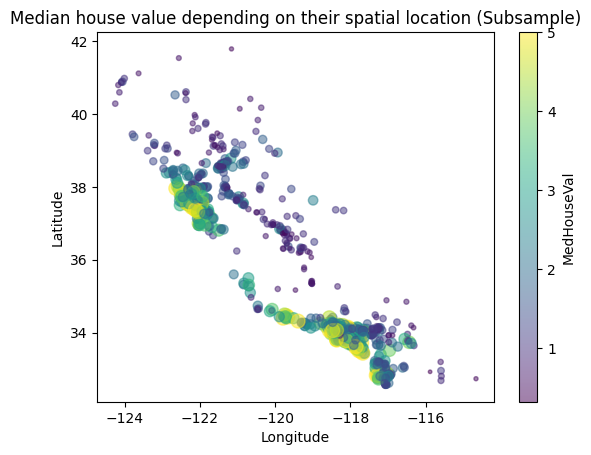

In [26]:
# Random subsampling: an effective method to reduce the number of data points 
# in a plot, which is useful when dealing with large datasets

# Number of samples you want to plot
n_samples = 1000

# Randomly select samples from the dataset
np.random.seed(0)  # For reproducibility
indices = np.random.choice(housing.frame.index, size=n_samples, replace=False)
subsample = housing.frame.loc[indices]

# Create scatter plot
plt.scatter(
    subsample['Longitude'],
    subsample['Latitude'],
    s=subsample['MedHouseVal'] / subsample['MedHouseVal'].max() * 100,  # Normalize the sizes
    c=subsample['MedHouseVal'],
    cmap='viridis',
    alpha=0.5
)
plt.colorbar(label='MedHouseVal')
plt.title("Median house value depending on their spatial location (Subsample)")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


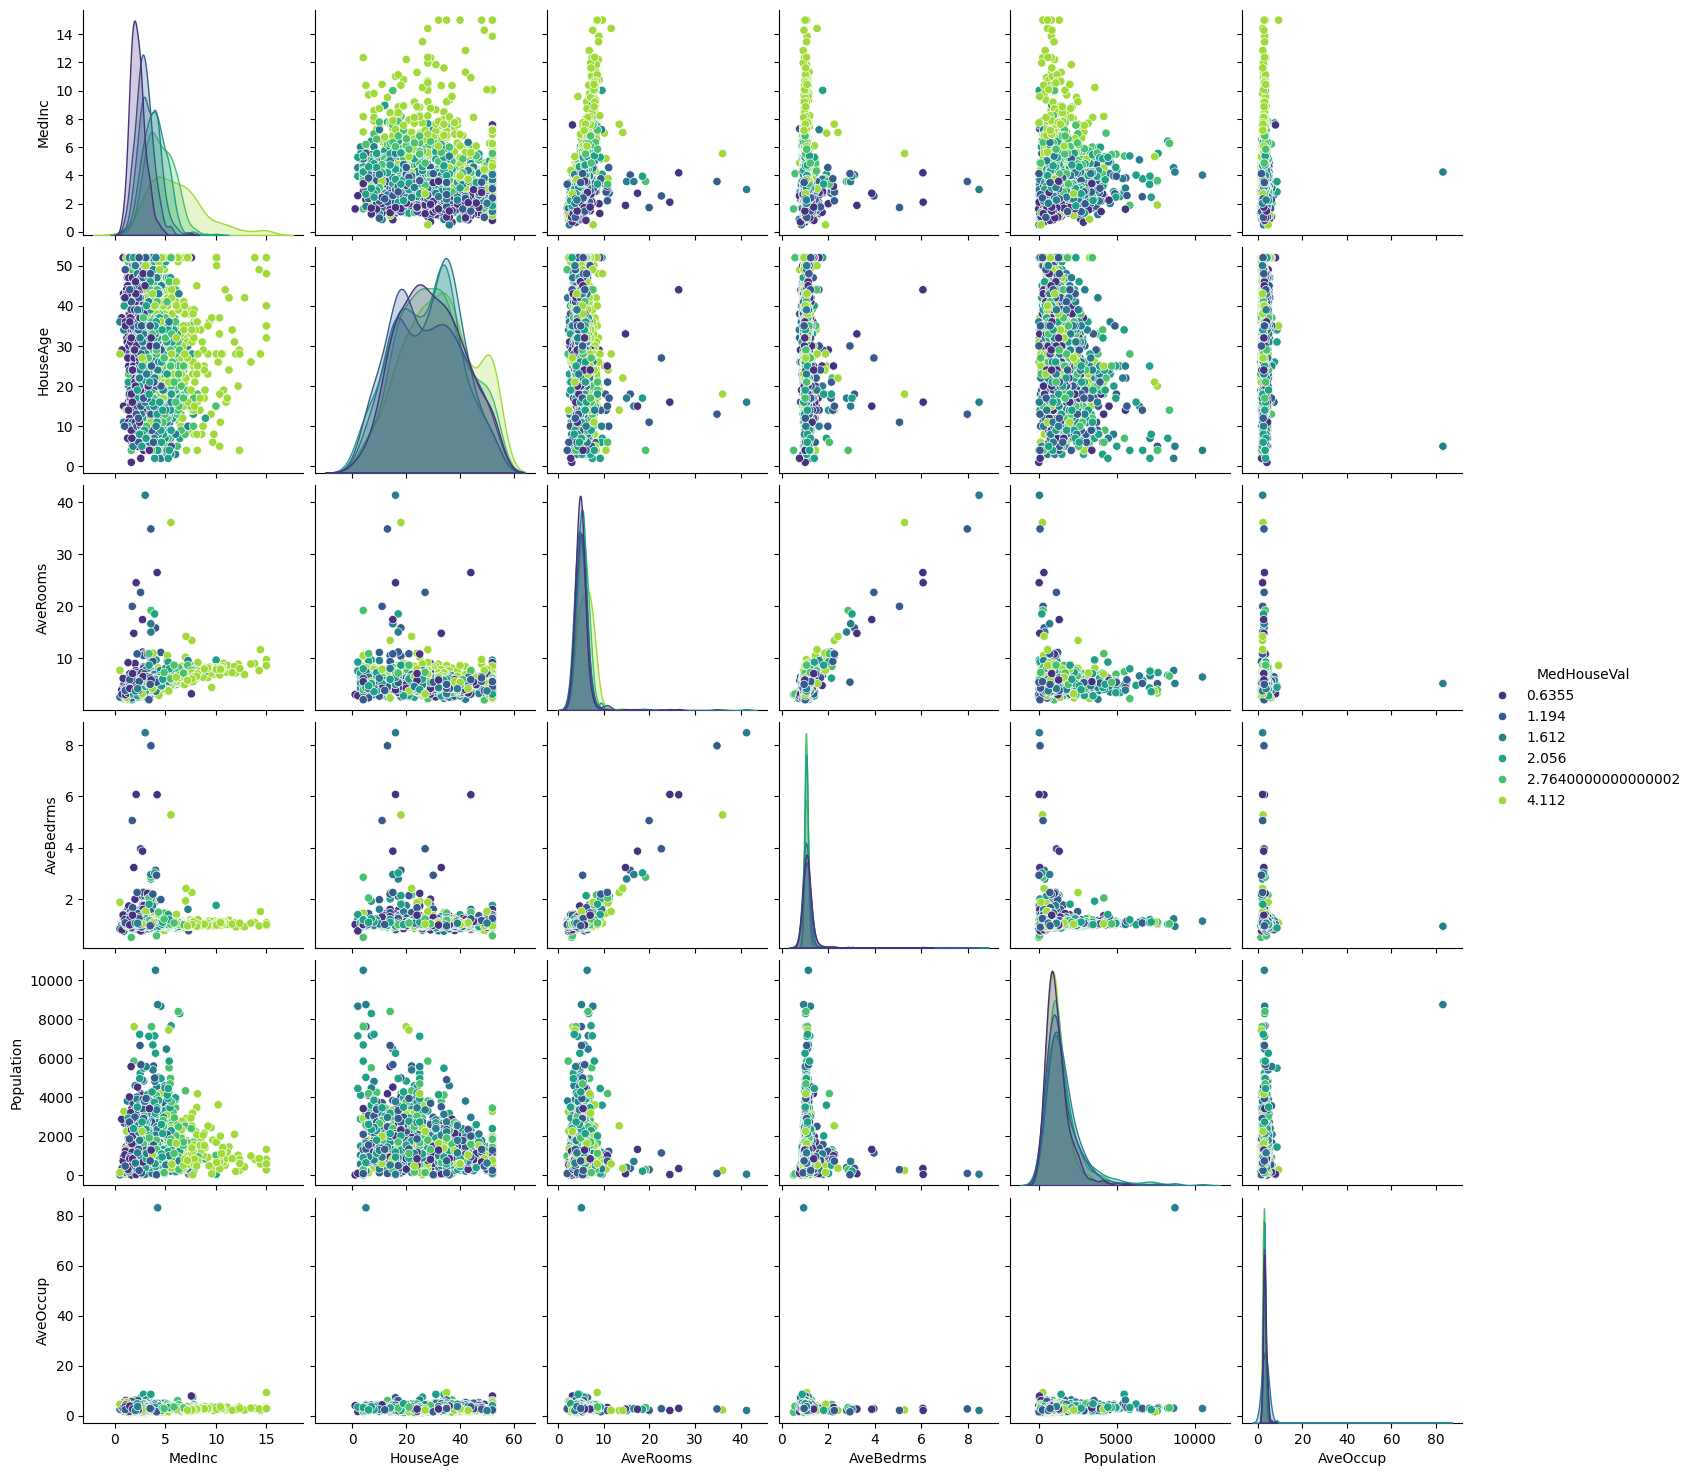

In [27]:
import pandas as pd
import seaborn as sns

sample_frac = 0.1  # e.g., 10% of the data
subset = housing.frame.sample(frac=sample_frac, random_state=42)

# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = subset.drop(columns=columns_drop)

# Quantize the target into 6 bins and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

# Generate a pairplot
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")


In [ ]:
# enough of analysis; let's split data, train the model and see its performance on test set
# 1. using LinearRegression from scikit
# 2. using our own regression model

In [32]:
# 1.a) Load and split the data
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
import numpy as np

# load the data
housing_bunch = fetch_california_housing()
housing = pd.DataFrame(housing_bunch.data, columns=housing_bunch.feature_names)
housing['MedHouseVal'] = housing_bunch.target

# Now you can drop the 'MedHouseVal' column to get your features
X = housing.drop('MedHouseVal', axis=1)  # features || inputs
y = housing['MedHouseVal']   # target variables || labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train[:5])   
print('--------------')
print(y_train[:5])
# the first col is the index of dataset

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   

       Longitude  
14196    -117.03  
8267     -118.16  
17445    -120.48  
14265    -117.11  
2271     -119.80  
--------------
14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: MedHouseVal, dtype: float64


In [33]:
# 1.b) Feature scaling
# this makes the training data more standardized/normalized 
# reducing the drastic effect of extreme values on the model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:5])

[[-0.326196    0.34849025 -0.17491646 -0.20836543  0.76827628  0.05137609
  -1.3728112   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 -0.12853018 -0.09890135 -0.11736222
  -0.87669601  0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 -0.25753771 -0.44981806 -0.03227969
  -0.46014647 -0.44760309]
 [-1.01786438  0.58654547 -0.60001532 -0.14515634 -0.00743434  0.07750687
  -1.38217186  1.23269811]
 [-0.17148831  1.14200767  0.3490073   0.08662432 -0.48587717 -0.06883176
   0.5320839  -0.10855122]]


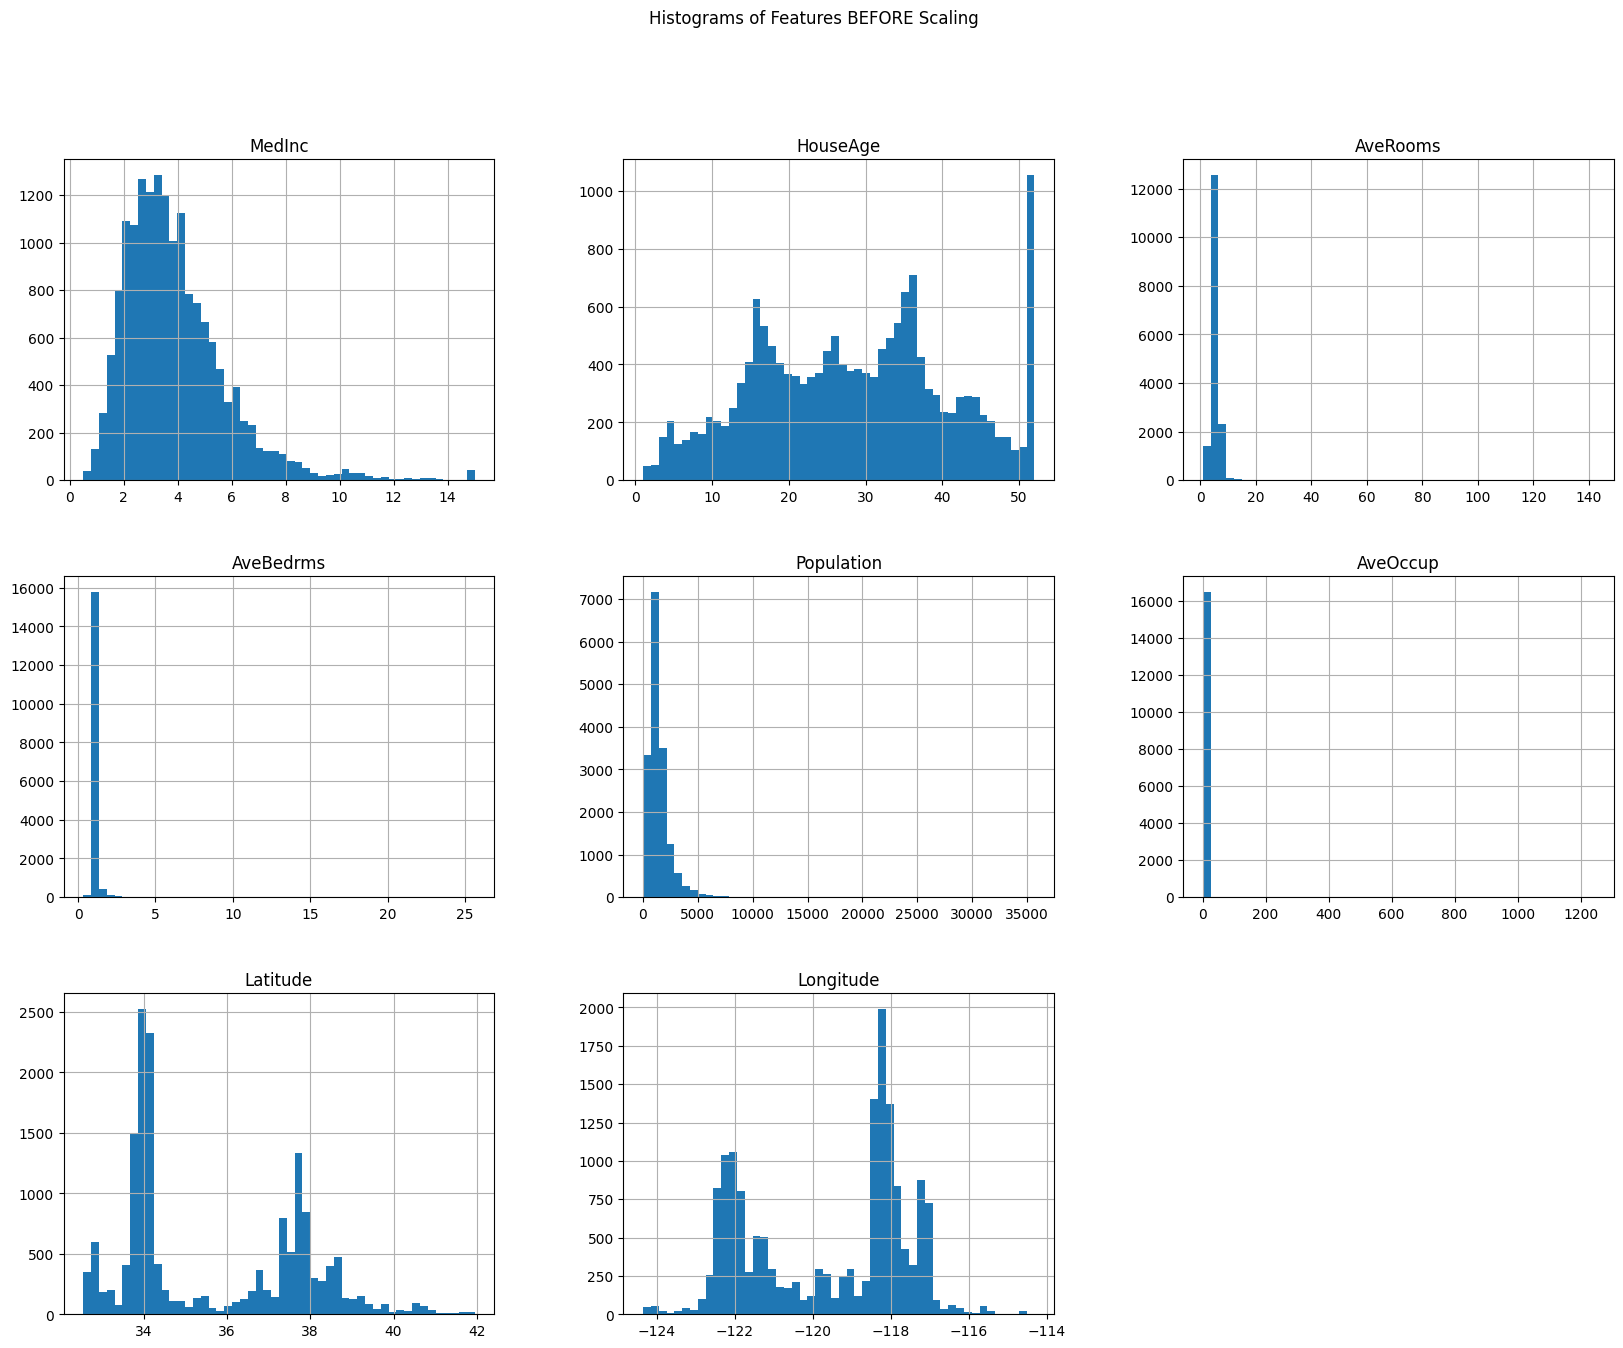

-------------------------------------------------------------------------


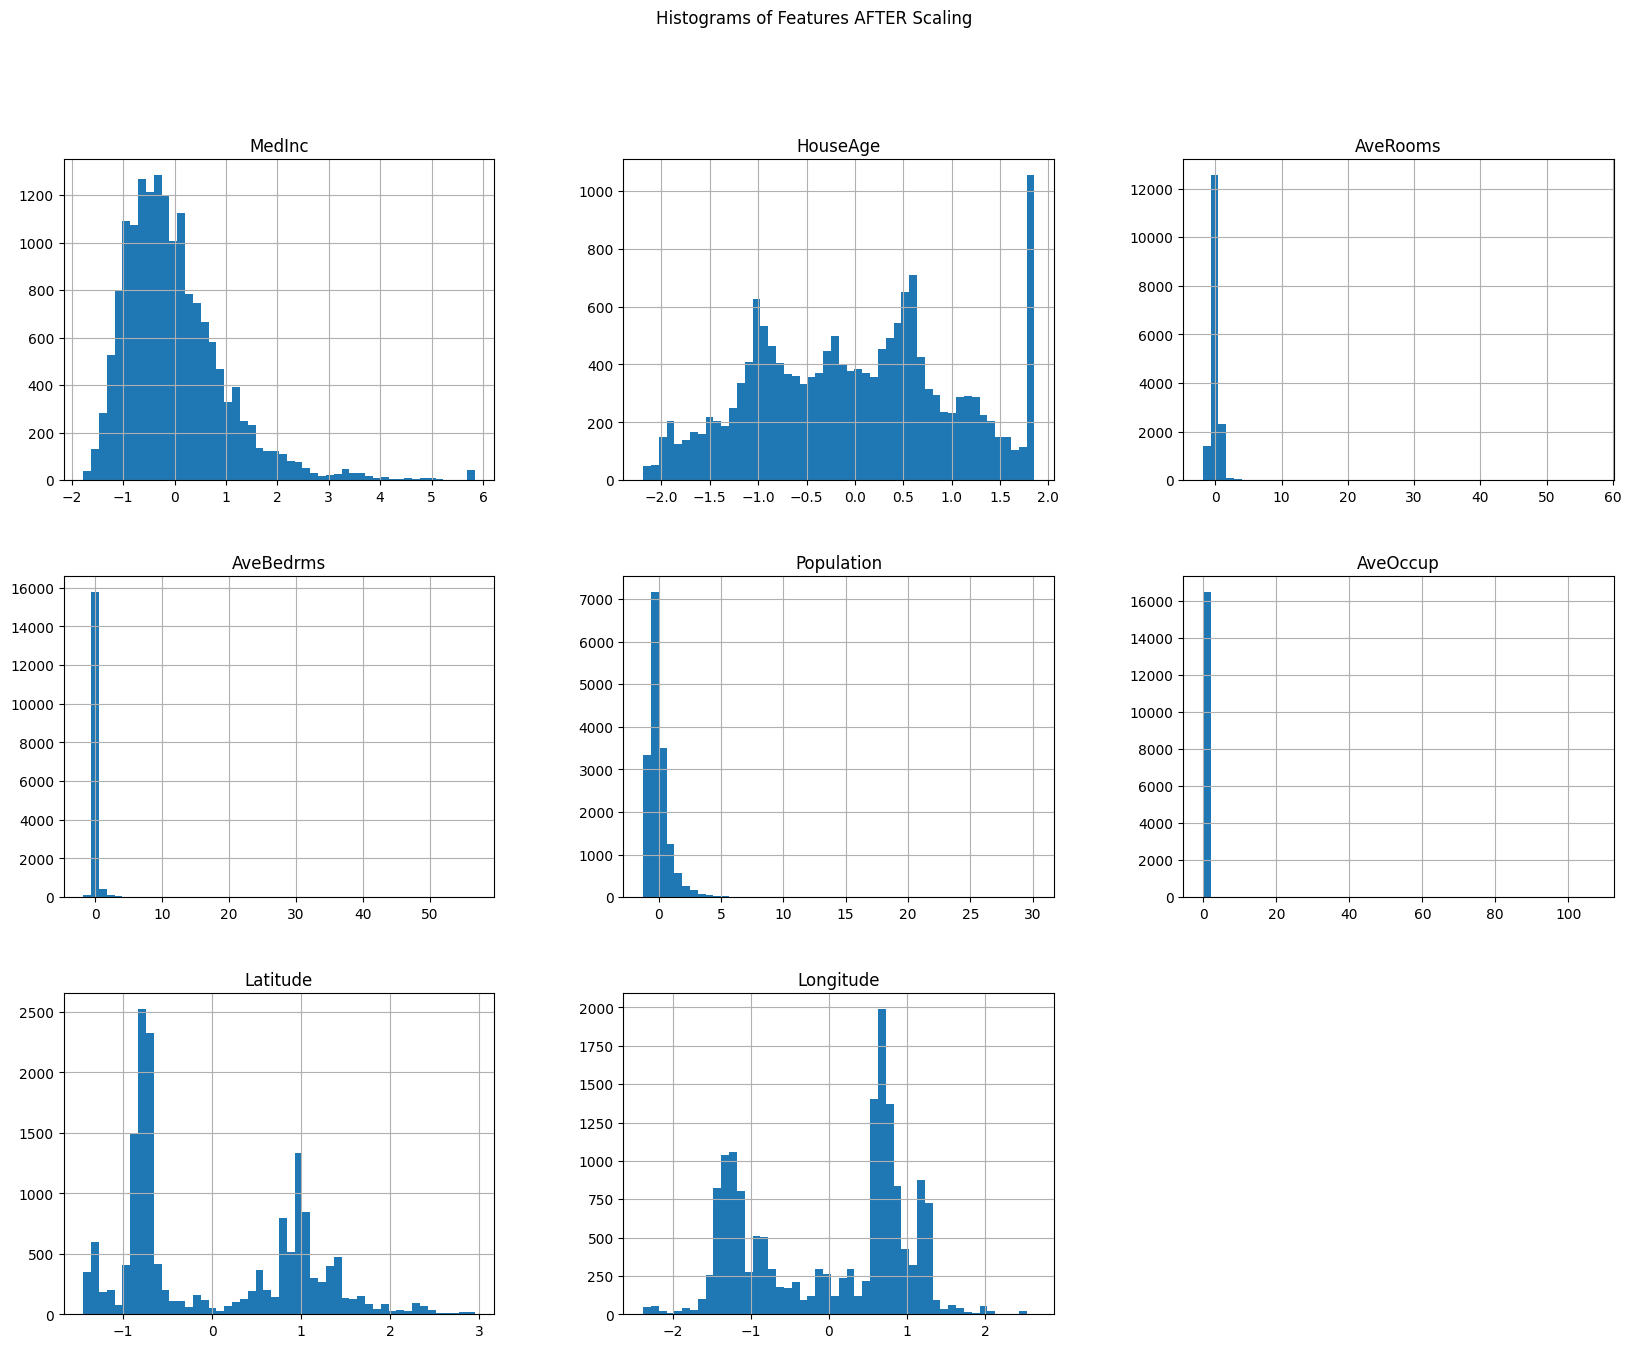

In [38]:
# ----- Effect of Feature Scaling visualized ------
import matplotlib.pyplot as plt

# Plot histograms of the features in X_train before scaling
X_train.hist(bins=50, figsize=(20,15))
plt.suptitle('Histograms of Features BEFORE Scaling')
plt.show()

print('-------------------------------------------------------------------------')
# Convert the scaled features back to a DataFrame for easy plotting
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Plot histograms of the features in X_train after scaling
X_train_scaled_df.hist(bins=50, figsize=(20,15))
plt.suptitle('Histograms of Features AFTER Scaling')
plt.show()

# NOTICE:- the x-axis values shifting around 0 in each of the graph after scaling; 
# gaussian distribution

In [28]:
# 1.c) Create the model instance, train and validate
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()

# train the model
model.fit(X_train_scaled, y_train)

# evaluate the model on test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)  # accuracy of the model
rmse = np.sqrt(mse)

# print the root mse
print(f"Root Mean Squred Error: {rmse}")

# interpret the results
# print the coefficients
print("Intercept:", model.intercept_)
print('Coefficients:', model.coef_)

Root Mean Squred Error: 0.7455813830127764
Intercept: 2.0719469373788777
Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


In [3]:
# ------------------- ALL THINGS AT ONE PLACE -----------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# load the data
housing_bunch = fetch_california_housing()
housing = pd.DataFrame(housing_bunch.data, columns=housing_bunch.feature_names)
housing['MedHouseVal'] = housing_bunch.target

# Now you can drop the 'MedHouseVal' column to get your features
X = housing.drop('MedHouseVal', axis=1)  # features || inputs
y = housing['MedHouseVal']   # target variables || labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the model
model = LinearRegression()

# train/fit the model 
model.fit(X_train_scaled, y_train)

# evaluate the model on test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)  # accuracy of the model
rmse = np.sqrt(mse)

# print the root mse
print(f"Root MSE:     {rmse}")

# interpret the results
# print the coefficients
print("Intercept:   ",  model.intercept_)
print('Coefficients:', model.coef_)

Root MSE:     0.7455813830127764
Intercept:    2.0719469373788777
Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


In [43]:
# So far in PART 2
# [done] - Load the California Housing dataset & analyze it for outliers(extreme values) and skews
# [done] - Preprocess the data: Splitting & Feature Scaling 
# [done] - Train & Evaluate a Linear Regression Model(from scikit) on the data
# []     - Make your own LR model for similar results as above 

In [ ]:
# we will
# 1. do more preprocessing of the data
# 2. initialize the model
# 3. Train: Forward pass(loss), backward pass(gradient), Update parameters, Repeat
# 4. Model performance on test dataset


In [21]:
# --------------- But After We do some more Preprocessing --------------------
# Add a bias term (column of ones) to the input features (X_train_scaled)

# WHY? 
# The column of ones acts as a bias term in the linear regression equation.
# In a linear regression model, the equation is typically y = mx + b, where:
# - y is the target variable
# - m is the slope (coefficient of x)
# - x is the input feature
# - b is the y-intercept (bias)

# By adding a column of ones, 
# 1. We are effectively incorporating the bias term into our feature matrix.
# 2. This allows us to use matrix operations to solve for both the coefficients
#    and the bias in a single step.

X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

# Shape of ones column: (16512, 1) - with all elements as 1.
# Shape of X_train_scaled: (16512, 8) - This represents our original features.

# Simple Example for Better Understanding:
a = np.ones((3, 1)) # col. of ones || sample bias vector
b = np.array([[2, 3], [5, 6], [8, 9]]) # Sample feature matrix
c = np.c_[a, b] # Concatenating the bias column with the feature matrix
a, b, c

(array([[1.],
        [1.],
        [1.]]),
 array([[2, 3],
        [5, 6],
        [8, 9]]),
 array([[1., 2., 3.],
        [1., 5., 6.],
        [1., 8., 9.]]))

In [27]:
# Initializing the Linear Regression Model
learning_rate = 0.01  
n_iterations = 1000   # Total number of training iterations
m = len(X_b)          # Number of training examples

# set the parameters/weights to random values 
# Shape => the number of features (8) + one for the bias 
theta = np.random.randn(X_b.shape[1], 1)  # 9 x 1 array

# Example to explain how Theta interacts with c(representing X_b):
# Consider a simpler case with only two features (plus bias).
c = np.c_[a,b]  # 3 x 3

# X_b = [[1, x1, x2], [1, x3, x4], [1, x5, x6]]
# 1s for bias, x1, x2,....,x6  are feature values

theta_ex = np.random.randn(3, 1)  # 3 x 1 array for bias + 2 features

# Example calculation for the first row of 'c':
# y0 = theta0 * 1 + theta1 * 2 + theta2 * 3
# y0 = (0.65 * 1) + (-1.22 * 2) + (0.61 * 3)
# This results in predicted values for y based on the features(x) and theta parameters 

# dot product of (3, 3) & (3, 1) matrix
y_ex = c.dot(theta_ex)   # shape: (3, 1)
c, theta_ex, y_ex

(array([[1., 2., 3.],
        [1., 5., 6.],
        [1., 8., 9.]]),
 array([[-0.63930028],
        [ 0.07941586],
        [ 0.35333016]]),
 array([[0.57952192],
        [1.87775998],
        [3.17599804]]))

In [34]:
# Train: 
# forward pass: compute predictions and loss (here: MSE)
y_pred = X_b.dot(theta)  # predictions

errors = y_pred - y_train.values.reshape(-1, 1)

# mse = (1/n) * sum((y_pred - y_actual)**2)
mse = (errors ** 2).mean()  # loss
y_pred[:5], errors[:5], mse

(array([[ 3.88882275],
        [ 4.20399943],
        [-1.30348217],
        [ 2.38508731],
        [ 2.59419776]]),
 array([[ 2.85882275],
        [ 0.38299943],
        [-3.02948217],
        [ 1.45108731],
        [ 1.62919776]]),
 6.502685850452075)

In [25]:
# Now, calculate error b/w predicted and actual values 
# to tweak paramters (thetas) for better predictions

# MSE = (1/n) * sum((y_actual - y_predicted)**2)

# Partial derivative of MSE w.r.t. theta_0:
# (2/n) * sum(y_predicted - y_actual)

# Partial derivative of MSE w.r.t. theta_1:
# (2/n) * sum((y_predicted - y_actual) * x)

# Gradient of MSE w.r.t. theta = (2/n) * X_transpose * (X * theta - y)
# X - the matrix of features, 
# y - the actual target values, and 
# theta is the parameters vector

gradients = 2/n  * X_b.T.dot(X_b.dot(theta) - y_train.values.reshape(-1, 1))

**Mean Squared Error (MSE) Equation:**
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Derivative of MSE w.r.t. Intercept (θ₀):**
$$\frac{\partial \text{MSE}}{\partial \theta_0} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)$$

**Derivative of MSE w.r.t. Weight of Feature (θ₁):**
$$\frac{\partial \text{MSE}}{\partial \theta_1} = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) x_i$$

**Derivative of MSE in Matrix Form (for Multiple Regression):**
$$\nabla_{\theta} \text{MSE}(\theta) = \frac{2}{n} \cdot X^T \cdot (X \cdot \theta - y)$$


In [38]:
# all things at one place: 
# ----------- Multiple Linear Regression Model -------------

import numpy as np

# Add a bias term (column of ones) to the input features(X_train_scaled)
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]  # AskGPT 
learning_rate = 0.01
n_iterations = 1000
m = len(X_b)

# set random parameters (weights)
theta = np.random.randn(X_b.shape[1], 1) # 9 x 1

# Train:
for iteration in range(n_iterations):
    # Forward pass(Loss):
    y_pred = X_b.dot(theta)  # predictions
    
    errors = y_pred - y_train.values.reshape(-1,1)  
    mse = (errors ** 2).mean()   # loss
    
    # Backward pass(Gradient) 
    gradients = 2/m * X_b.T.dot(y_pred - y_train.values.reshape(-1, 1)) 
    
    # Update parameters 
    theta -= learning_rate * gradients
    
    # print loss every 100 iterations
    if iteration % 100 == 0:
        print(f"loss(mse):", mse)

# Final parameters
intercept, coefficients = theta[0, 0], theta[1:].flatten()

# Predictions on the test set
print("Model performance on test set....")
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]  # Add a column of ones to account for the bias
y_pred = X_test_b.dot(theta)

# Compute RMSE(on test set); accuracy of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')
print('Intercept              :', intercept)
print('Coefficients           :', coefficients)

loss(mse): 14.812311208455965
loss(mse): 0.7887939080561029
loss(mse): 0.5361384425711008
loss(mse): 0.5269523302192374
loss(mse): 0.5249110083379729
loss(mse): 0.5235254529998359
loss(mse): 0.5224402052944686
loss(mse): 0.5215768811019489
loss(mse): 0.5208867747832346
loss(mse): 0.5203331055738944
Model performance on test set....
Root Mean Squared Error: 0.7483126934099953
Intercept              : 2.0719469319541957
Coefficients           : [ 0.89146826  0.13580868 -0.35077875  0.37984165  0.00199132 -0.04299724
 -0.7665052  -0.74324782]


In [36]:
# ----------- Some useful Visualizations -------------------

In [45]:
# Updated code for Visualizations
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Add a bias term (column of ones) to the input features (X_train_scaled)
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
learning_rate = 0.01
n_iterations = 1000
m = len(X_b)

# Initialize lists for visualizations
train_loss = []
gradient_magnitude = []
theta_values = []

# Set random parameters (weights)
theta = np.random.randn(X_b.shape[1], 1)  # 9 x 1

# Train the model
for iteration in range(n_iterations):
    # Forward pass (Loss)
    y_pred = X_b.dot(theta)
    errors = y_pred - y_train.values.reshape(-1, 1)
    mse = (errors ** 2).mean()
    train_loss.append(mse)

    # Backward pass (Gradient)
    gradients = 2/m * X_b.T.dot(errors)
    gradient_magnitude.append(np.linalg.norm(gradients))
    theta_values.append(theta.flatten())

    # Update parameters
    theta -= learning_rate * gradients

    # Print loss every 100 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Loss (MSE) =", mse)

# Convert lists to NumPy arrays
theta_values = np.array(theta_values)

# Final parameters
intercept, coefficients = theta[0, 0], theta[1:].flatten()

# Predictions on the test set
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_pred = X_test_b.dot(theta)

# Compute RMSE on test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Squared Error: {rmse}')
print('Intercept:', intercept)
print('Coefficients:', coefficients)

Iteration 0: Loss (MSE) = 10.817072358846326
Iteration 100: Loss (MSE) = 0.7162935555301525
Iteration 200: Loss (MSE) = 0.6097777955599201
Iteration 300: Loss (MSE) = 0.5893904013428876
Iteration 400: Loss (MSE) = 0.5762015726260918
Iteration 500: Loss (MSE) = 0.5656883594302028
Iteration 600: Loss (MSE) = 0.557130388303261
Iteration 700: Loss (MSE) = 0.5501402120388045
Iteration 800: Loss (MSE) = 0.544420776479402
Iteration 900: Loss (MSE) = 0.5397344487905351
Root Mean Squared Error: 0.7445452400908674
Intercept: 2.071946936066634
Coefficients: [ 0.69113362  0.09834871  0.01543779  0.07963734 -0.00954748 -0.03440148
 -1.20997296 -1.16296025]


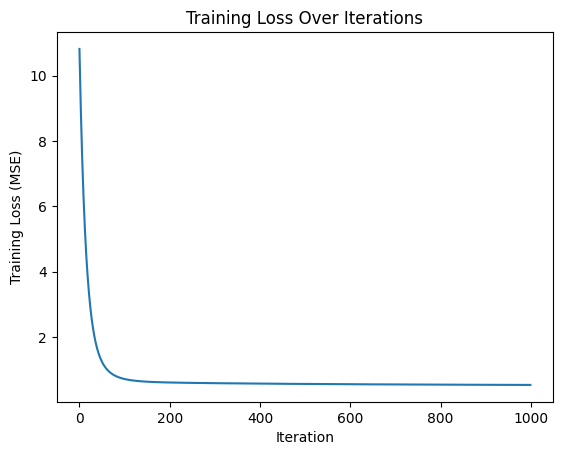

In [46]:
# 1. Training Loss over Iterations
plt.plot(train_loss)
plt.xlabel('Iteration')
plt.ylabel('Training Loss (MSE)')
plt.title('Training Loss Over Iterations')
plt.show()


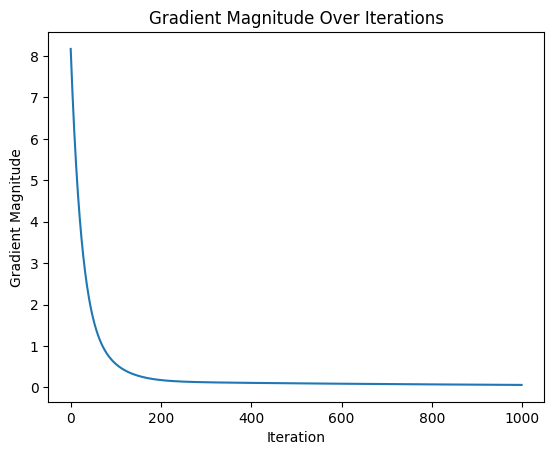

In [47]:
# 2. Gradient Magnitude Over Iterations
plt.plot(gradient_magnitude)
plt.xlabel('Iteration')
plt.ylabel('Gradient Magnitude')
plt.title('Gradient Magnitude Over Iterations')
plt.show()

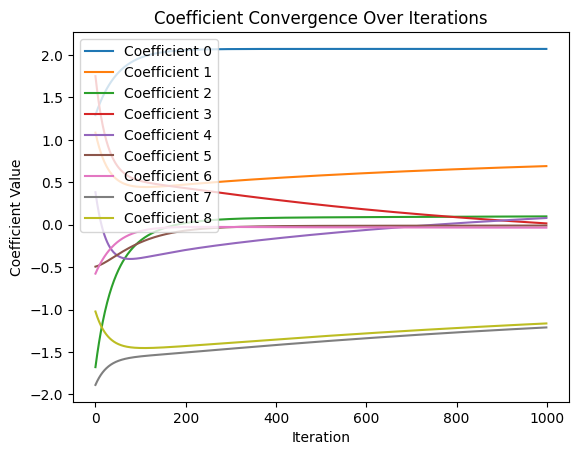

In [48]:
# 3. Coefficient Convergence
for i in range(theta_values.shape[1]):
    plt.plot(theta_values[:, i], label=f'Coefficient {i}')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Convergence Over Iterations')
plt.show()

# this plot shows how each model parameter(coeff.) stabilizes over training.. 
# It helps evaluate if the learning process is effective and 
# if the model parameters are converging to optimal values.
# oscillating - high learning rate
# smooth converging lines - effective learning rate & para updates

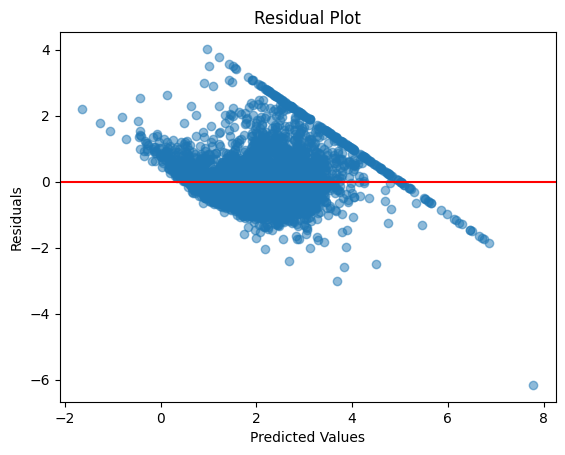

In [50]:
# Ensure y_pred is one-dimensional
y_pred = y_pred.flatten()
# 4. Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
# This plot shows the difference between actual and predicted values. 
# Ideally, residuals should be randomly scattered around 0, indicating no pattern.

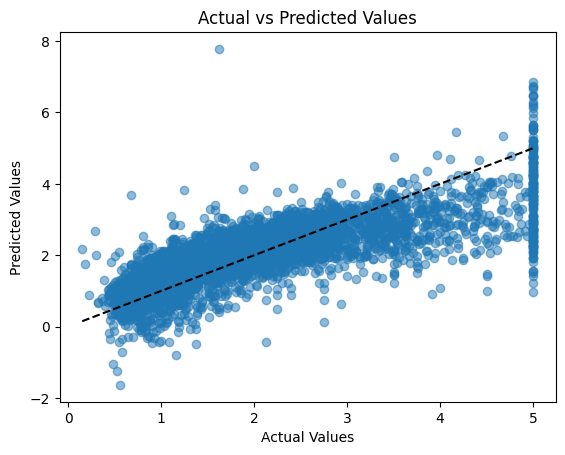

In [51]:
# 5. Actual vs. Predicted Values Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

# This plot compares the actual values with the predicted values. 
# A perfect alignment along the diagonal line indicates an accurate model.

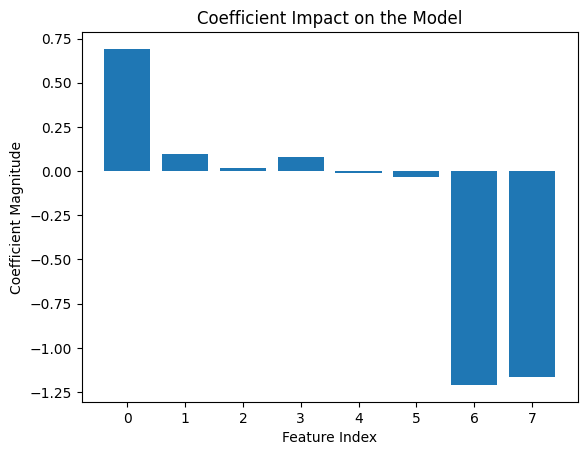

In [52]:
# 6. Coefficient Impact Plot
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Magnitude')
plt.title('Coefficient Impact on the Model')
plt.show()

# This bar plot shows the magnitude and direction (positive or negative) 
# of each feature's impact on the model. Large bars indicate more significant 
# features.

In [53]:
"The End"

'The End'